In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('data/Weekly.csv')
data.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


<Figure size 1440x1440 with 0 Axes>

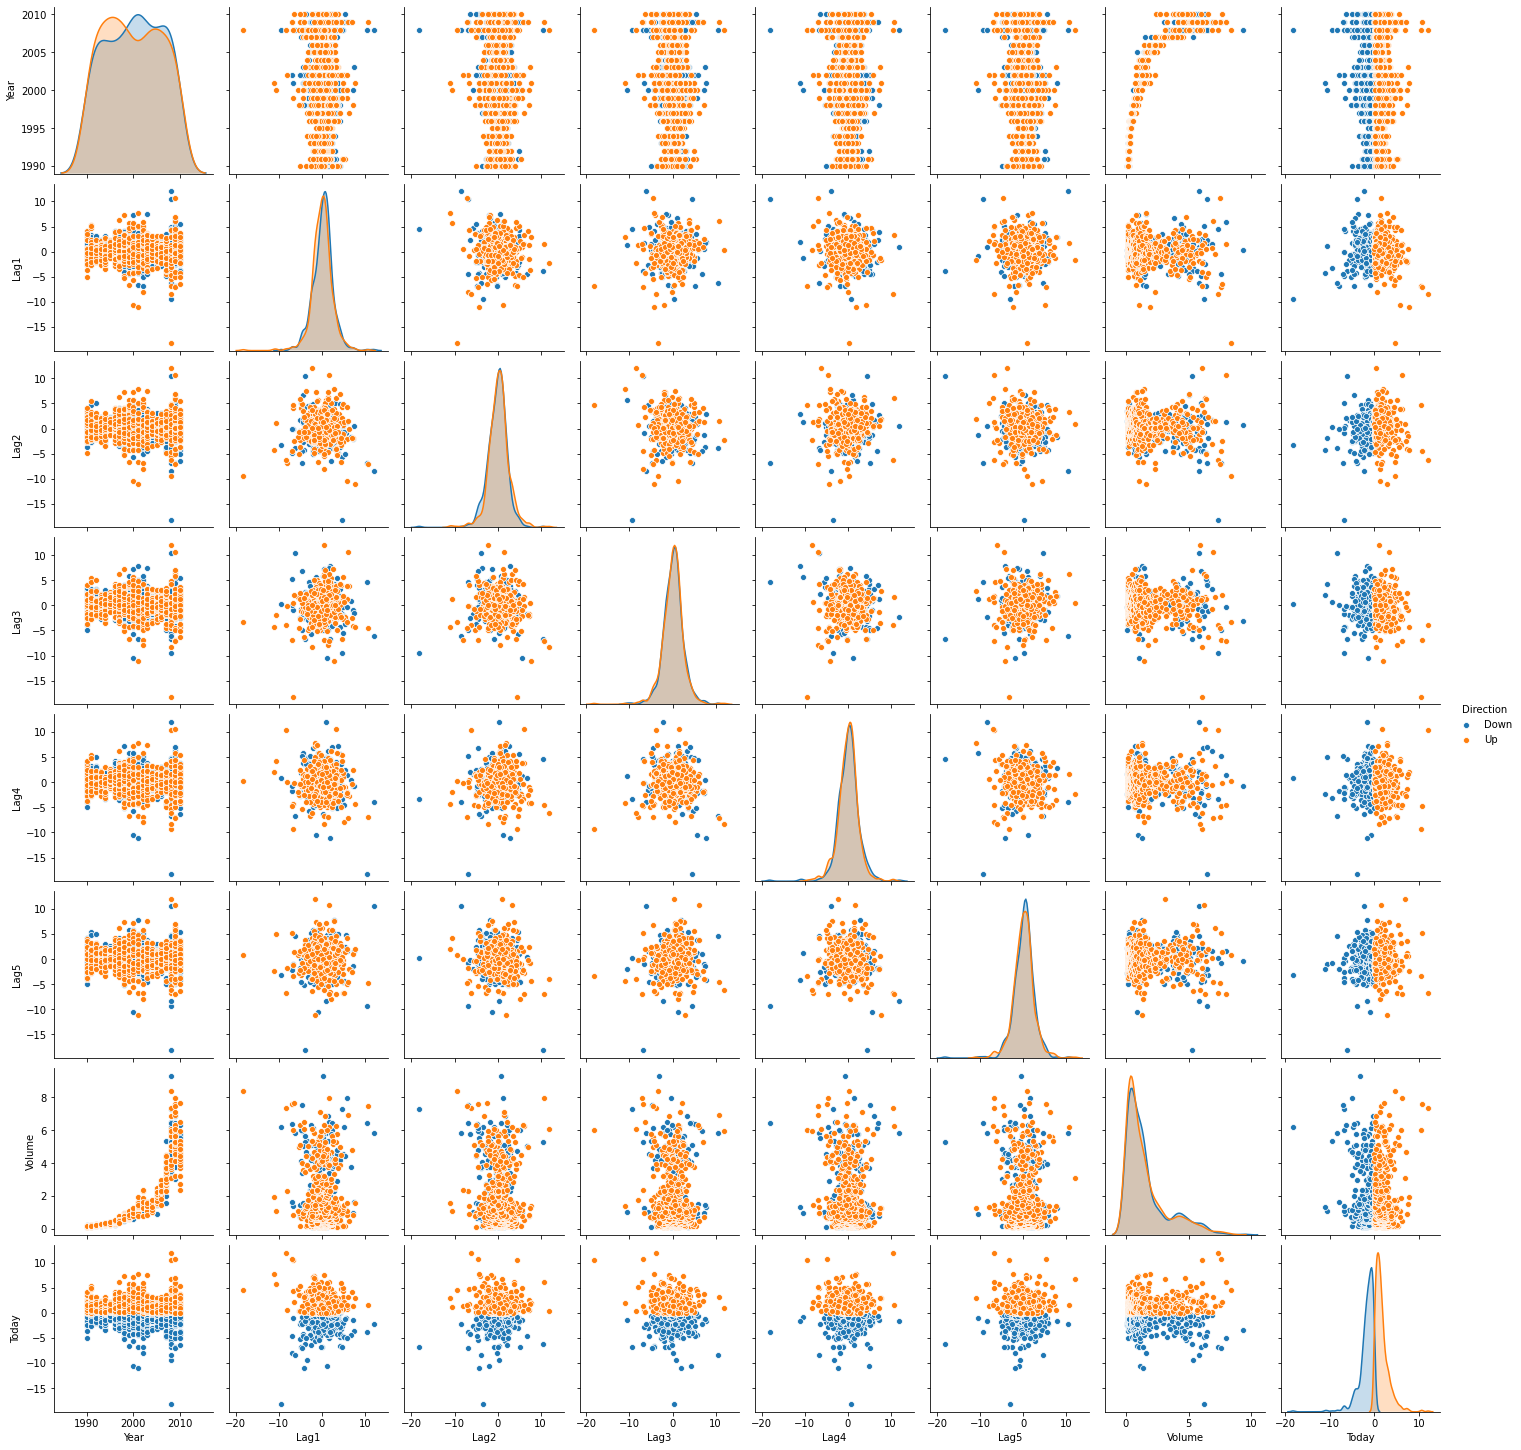

In [5]:
plt.figure(figsize=(20,20))
sb.pairplot(data=data, hue='Direction');

In [6]:
np.mean(data['Direction']=='Up')

0.5555555555555556

In [7]:
# It seem no pattern between each predictors
# Seem Lag predictor have high kutosis more than normal distribution

In [12]:
logis = smf.glm(formula='Direction ~ 1 + Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=data, family = sm.families.Binomial()).fit()
print(logis.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Thu, 08 Oct 2020   Deviance:                       1486.4
Time:                                          15:36:16   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [13]:
logis.pvalues[logis.pvalues<0.05]

Intercept    0.001899
Lag2         0.029601
dtype: float64

In [20]:
logis_pred = logis.predict()
logis_pred_nominal = ['Down' if x > 0.5 else 'Up' for x in logis_pred]
pd.DataFrame(confusion_matrix(data['Direction'], logis_pred_nominal), ['Down', 'Up'], ['Pred Down', 'Pred Up'])

Pred Down  Pred Up
Down         54      430
Up           48      557

In [21]:
print(classification_report(data['Direction'], logis_pred_nominal))

              precision    recall  f1-score   support

        Down       0.53      0.11      0.18       484
          Up       0.56      0.92      0.70       605

    accuracy                           0.56      1089
   macro avg       0.55      0.52      0.44      1089
weighted avg       0.55      0.56      0.47      1089



In [22]:
data.tail()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

In [59]:
data_train = data[data['Year']<=2008]
data_test  = data[data['Year']>2008]
logis = smf.glm(formula='Direction ~ 1 + Lag2', data=data_train, family = sm.families.Binomial()).fit()
print(logis.summary())
print(logis.pvalues[logis.pvalues<0.05])

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      983
Model Family:                                  Binomial   Df Model:                            1
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -675.27
Date:                                  Thu, 08 Oct 2020   Deviance:                       1350.5
Time:                                          16:31:49   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [60]:
logis_pred = logis.predict(data_test)
logis_pred_nominal = ['Down' if x >= 0.5 else 'Up' for x in logis_pred]
print(pd.DataFrame(confusion_matrix(data_test['Direction'], logis_pred_nominal), ['Down', 'Up'], ['Pred Down', 'Pred Up']))
print('========================')
print(classification_report(data_test['Direction'], logis_pred_nominal))

      Pred Down  Pred Up
Down          9       34
Up            5       56
              precision    recall  f1-score   support

        Down       0.64      0.21      0.32        43
          Up       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [65]:
# Using LDA
X_train, y_train = np.array(data_train['Lag2']).reshape(-1,1), data_train['Direction']
X_test, y_test = np.array(data_test['Lag2']).reshape(-1,1), data_test['Direction']
lda = LDA().fit(X_train, y_train)
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [66]:
lda.priors_

array([0.44771574, 0.55228426])

In [67]:
lda_pred = lda.predict_proba(X_test)[:,0]
lda_pred_nominal = ['Down' if x >= 0.5 else 'Up' for x in lda_pred]
print(pd.DataFrame(confusion_matrix(data_test['Direction'], lda_pred_nominal), ['Down', 'Up'], ['Pred Down', 'Pred Up']))
print('========================')
print(classification_report(data_test['Direction'], lda_pred_nominal))

      Pred Down  Pred Up
Down          9       34
Up            5       56
              precision    recall  f1-score   support

        Down       0.64      0.21      0.32        43
          Up       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [68]:
# LDA same exactly Logistic Regression

In [69]:
# Using QDA
qda = QDA().fit(X_train, y_train)
qda.classes_

array(['Down', 'Up'], dtype=object)

In [70]:
qda_pred = qda.predict_proba(X_test)[:,0]
qda_pred_nominal = ['Down' if x > 0.5 else 'Up' for x in qda_pred]
print(pd.DataFrame(confusion_matrix(data_test['Direction'], qda_pred_nominal), ['Down', 'Up'], ['Pred Down', 'Pred Up']))
print('========================')
print(classification_report(data_test['Direction'], qda_pred_nominal))

      Pred Down  Pred Up
Down          0       43
Up            0       61
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        43
          Up       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104



In [71]:
# QDA worse than LDA and Logistic Regression

In [72]:
# Using KNN with K = 1
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn.classes_

array(['Down', 'Up'], dtype=object)

In [73]:
knn_pred_nominal = knn.predict(X_test)
print(pd.DataFrame(confusion_matrix(data_test['Direction'], knn_pred_nominal, labels=['Down', 'Up']), ['Down', 'Up'], ['Pred Down', 'Pred Up']))
print('========================')
print(classification_report(data_test['Direction'], knn_pred_nominal))

      Pred Down  Pred Up
Down         21       22
Up           31       30
              precision    recall  f1-score   support

        Down       0.40      0.49      0.44        43
          Up       0.58      0.49      0.53        61

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.51      0.49      0.49       104



In [74]:
# KNN with K = 1 nearly random walk 50% accuracy

In [75]:
# Linear provide best in this case, but it not much better than random

In [79]:
type(data['Year'].mode())

pandas.core.series.Series

In [113]:
logis_special = smf.glm(formula='Direction ~ Lag2 + I(Lag2**2)', data=data, subset=data['Year']<=2008, family=sm.families.Binomial()).fit()
print(logis_special.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  985
Model:                                              GLM   Df Residuals:                      982
Model Family:                                  Binomial   Df Model:                            2
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -674.72
Date:                                  Thu, 08 Oct 2020   Deviance:                       1349.4
Time:                                          17:05:38   Pearson chi2:                     985.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                   coef    std

In [121]:
logis_s_pred = logis_special.predict(data_test)
logis_s_pred_nominal = ['Down' if x >= 0.5 else 'Up' for x in logis_s_pred]
print(pd.DataFrame(confusion_matrix(data_test['Direction'], logis_s_pred_nominal), ['Down', 'Up'], ['Pred Down', 'Pred Up']))
print('========================')
print(classification_report(data_test['Direction'], logis_s_pred_nominal))
print('========================')
print('Accuracy rate: %.2f'%((np.mean(logis_s_pred_nominal==y_test))*100))

      Pred Down  Pred Up
Down          8       35
Up            4       57
              precision    recall  f1-score   support

        Down       0.67      0.19      0.29        43
          Up       0.62      0.93      0.75        61

    accuracy                           0.62       104
   macro avg       0.64      0.56      0.52       104
weighted avg       0.64      0.62      0.56       104

Accuracy rate: 62.50


In [136]:
# Using KNN
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
knn_pred_nominal = knn.predict(X_test)
print(pd.DataFrame(confusion_matrix(data_test['Direction'], knn_pred_nominal, labels=['Down', 'Up']), ['Down', 'Up'], ['Pred Down', 'Pred Up']))
print('========================')
print(classification_report(data_test['Direction'], knn_pred_nominal))
print('========================')
print('Accuracy rate: %.2f'%((np.mean(knn_pred_nominal==y_test))*100))

      Pred Down  Pred Up
Down         23       20
Up           22       39
              precision    recall  f1-score   support

        Down       0.51      0.53      0.52        43
          Up       0.66      0.64      0.65        61

    accuracy                           0.60       104
   macro avg       0.59      0.59      0.59       104
weighted avg       0.60      0.60      0.60       104

Accuracy rate: 59.62
